

After data selection and preprocessing I used 22 languages from the original dataset Which Includes following Languages

⦁ English
⦁ Arabic
⦁ French
⦁ Hindi
⦁ Urdu
⦁ Portuguese
⦁ Persian
⦁ Pushto
⦁ Spanish
⦁ Korean
⦁ Tamil
⦁ Turkish
⦁ Estonian
⦁ Russian
⦁ Romanian
⦁ Chinese
⦁ Swedish
⦁ Latin
⦁ German
⦁ Dutch
⦁ Japanese
⦁ Thai

In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
import pickle
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download('stopwords')

     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data= pd.read_csv("/content/dataset.csv")

In [ ]:
data.Text.head(20),data.language.head(20)

(0     klement gottwaldi surnukeha palsameeriti ning ...
 1     sebes joseph pereira thomas  på eng the jesuit...
 2     ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
 3     விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
 4     de spons behoort tot het geslacht haliclona en...
 5     エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...
 6     tsutinalar i̇ngilizce tsuutina kanadada albert...
 7     müller mox figura centralis circulorum doctoru...
 8     برقی بار electric charge تمام زیرجوہری ذرات کی...
 9     シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...
 10    kemunculan pertamanya adalah ketika mencium ka...
 11    barocco pt escândalo de ª página é um filme fr...
 12    association de recherche et de sauvegarde de l...
 13    胡赛尼本人和小说的主人公阿米尔一样，都是出生在阿富汗首都喀布尔，少年时代便离开了这个国家。胡...
 14    한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문물...
 15    การฟาดฟันของบรรดาสาวงามในกองประกวด miss beauty...
 16    dorota rabczewska artistinimega doda sündinud ...
 17    diante destes gerenciame

In [ ]:
data.shape

(3449, 2)

In [ ]:
data['language'].value_counts()



Russian       185
Japanese      172
Tamil         167
Swedish       167
Pushto        166
Turkish       165
Hindi         164
Portugese     162
Indonesian    159
French        158
Thai          157
Persian       156
Dutch         155
Latin         154
Korean        151
Urdu          149
Estonian      147
English       146
Romanian      145
Arabic        145
Chinese       142
Spanish       136
Name: language, dtype: int64

In [ ]:
data['language'][2]



'Thai'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


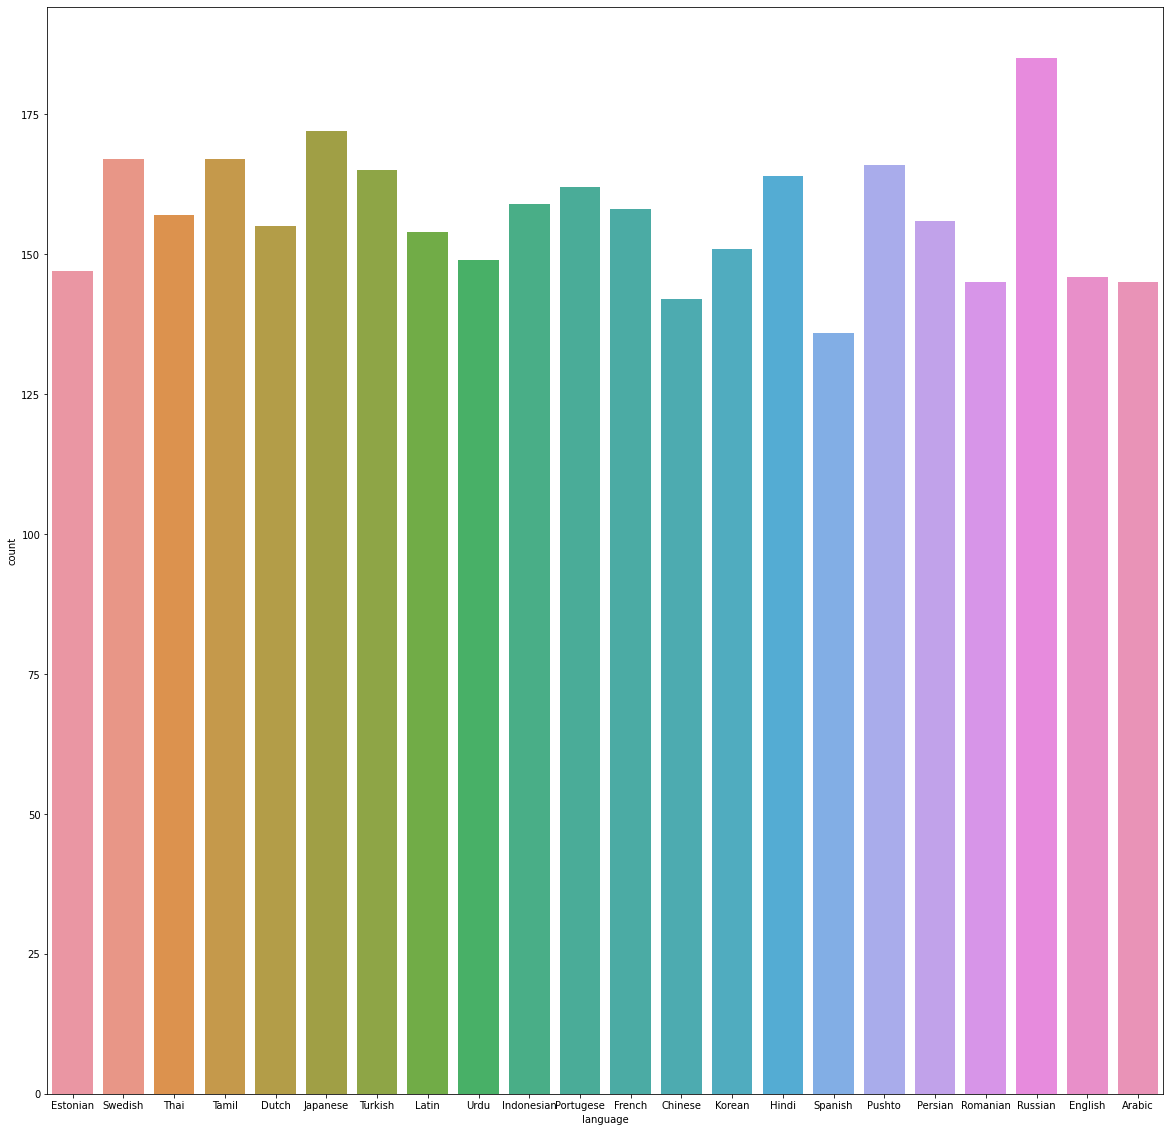

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(data['language'])



In [ ]:
ps = PorterStemmer()
corpus=[]

for i in range(len(data['Text'])):
    
    rev = re.sub("^[a-zA-Z]",' ', data['Text'][i]) 
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if set(stopwords.words())]
    rev = ' '.join(rev)
    corpus.append(rev)
    
    print(f"{i}")



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(data['language'])

In [ ]:
label.classes_

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu', nan], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:

classifier = MultinomialNB().fit(X_train,y_train)
ypred = classifier.predict(X_test)


In [ ]:
rf=RandomForestClassifier().fit(X_train,y_train)

In [ ]:
pred = rf.predict(X_test)

In [ ]:
pred

array([ 8,  0,  6, 12, 15, 19, 17,  4,  8,  4,  5, 15, 20,  5,  6,  9, 19,
       14,  8,  8, 12,  5,  6, 10,  8, 17, 13, 17, 20, 16, 21,  4, 21, 20,
        8, 11,  3,  6, 15, 10,  5,  3,  7,  9, 13, 11,  4,  4, 11, 18,  5,
       15, 18, 16, 12, 16, 21,  9, 14, 13,  2,  0,  9,  8,  0, 16, 16, 21,
        2,  0, 16, 14,  3,  2,  5,  4,  2, 21, 15, 19,  8,  4, 14,  8, 16,
       18, 13,  3, 17,  4,  2, 20,  3,  2,  6, 21,  8,  7,  9,  4, 12,  0,
       18,  2, 19, 15, 12, 12,  8,  2, 18, 20, 18,  8,  6, 14, 11, 10, 11,
       20, 18, 12,  8, 18, 16,  6,  1, 16,  8,  9,  4, 14,  5, 16, 20,  0,
       19, 14, 12,  7, 20,  6,  2,  8, 10, 10,  8,  2,  1, 10,  5, 13, 11,
       13,  1, 13, 19, 21,  7,  4,  7, 17,  5,  7,  0, 12, 14, 21,  4,  8,
        2, 18, 16, 21, 13, 11, 21, 17, 12, 17, 14, 13, 18,  0, 16, 11, 20,
       15,  2,  3,  9, 15, 20, 12, 15,  8, 11,  7,  5, 18, 20,  8, 20,  7,
       20, 10, 10, 10,  5, 11,  7, 20,  6,  9,  6,  2, 19,  8,  2, 13,  6,
       18, 15, 16,  4,  0

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9405797101449276
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  1  0  0  0  0 16  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 28  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 29  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  1  0  0  0 37  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 34  

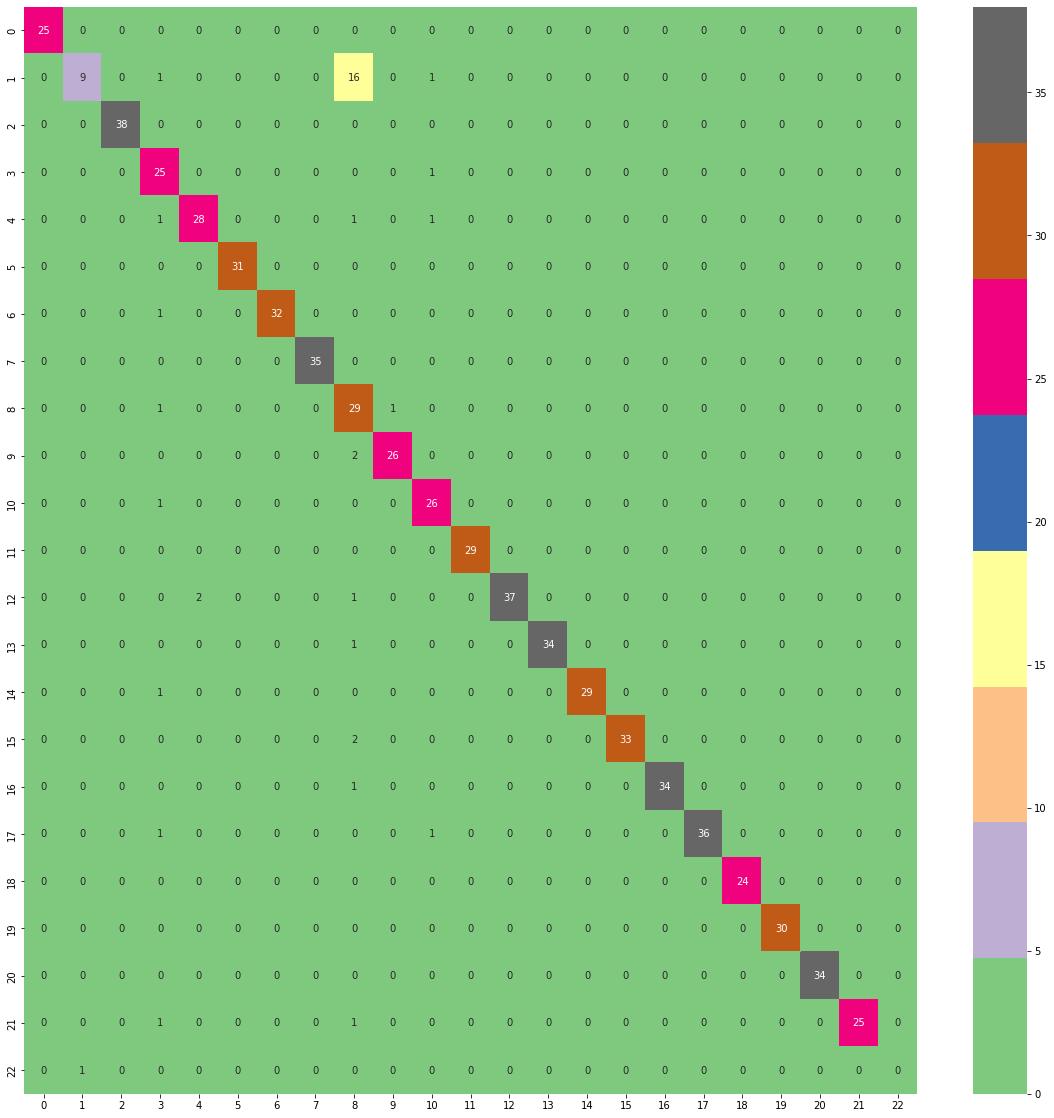

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.Accent)